#### Script 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
%matplotlib inline

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches


# script 2 - takes in standards.txt and a list of FITS files
#
# write out for each image:
# loop throuhg the standards stars:
#     find the photometry from the current FITS image
#     IF star is not found (or bad data) write out NaN in the column
#
# write out for each image file:
#
# the name of the image file, the EPOCH, the FILTER, the AIRMASS, the FLUX and FLUXERR of J0600, (FLUX and FLUXERR for 20 stars)
# use and ECSV format (because it remembers the names of the columns and deals with 'Quantity' columns too....)


# make a plot of flux versus epoch (which is in MJD) for 

In [53]:
# First write out for one file:
#  the name of the image file, the EPOCH, the FILTER, the AIRMASS, the FLUX and FLUXERR of J0600, (FLUX and FLUXERR for 20 stars)
#  use and ECSV format (because it remembers the names of the columns and deals with 'Quantity' columns too....)

standards = ascii.read("standards.txt", guess=False)
coord_world = np.array([standards['RA'],standards['Dec']]).transpose()
nr_stars = len(coord_world[:,0])
print('Number of stars = {}'.format(nr_stars))


filename = '..//data/coj1m003-fa19-20210112-0083-e91.fits.fz'

hdu1 = fits.open(filename)

imh = hdu1['SCI'].header
phot = hdu1['cat'].data

epoch = imh['MJD-OBS']
obs_filter = imh['FILTER']
airmass = imh['AIRMASS']
pix_asec = imh['PIXSCALE'] # Nominal pixel scale on sky [arcsec/pixel]
print('Epoch = {:.5f} MJD'.format(epoch))
print('Filter = {}'.format(obs_filter))
print('AIRMASS = {:.5f}'.format(airmass))

Number of stars = 44
Epoch = 59226.45471 MJD
Filter = gp
AIRMASS = 1.07476


In [51]:
# Transform coordinates from realworld to pixels in image
w = wcs.WCS(hdu1['SCI'].header)

coord = w.wcs_world2pix(coord_world,0)

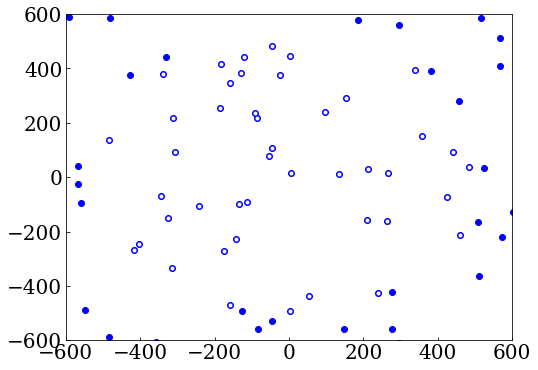

[ 59 241 286 281 690 686 382 197 320 374 227 753  32 569 292 296 742 423
 175 159 234 105  83 335 660 446 727 403 611 209 220 679 344 208 721 724
  34   0 630 526 346 662 776 563]
[5.17893149e-11 4.41104930e-11 8.28089807e-11 4.77484718e-11
 1.25947983e-10 2.32999780e-11 1.86668110e-11 6.23704684e-11
 2.36392090e-11 5.87751056e-11 1.86668110e-11 1.45038743e-11
 4.25048921e-11 6.17695230e-11 7.87727558e-11 3.89732010e-11
 5.53915128e-11 6.39304263e-11 1.08943315e-10 3.76761679e-11
 9.81140463e-11 5.57362404e-11 7.55294829e-11 4.15117334e-11
 4.15042603e-11 5.90423373e-11 7.06323798e-11 2.14503896e-11
 5.24991981e-11 5.56745234e-11 9.44060867e-11 4.94818615e-11
 5.55839121e-11 2.90727276e-11 4.43512739e-11 1.20850766e-11
 6.41258265e-11 4.87619798e-11 5.83163613e-11 1.78535252e-10
 3.95656329e-11 1.13554429e-10 6.07543142e-11 7.99250003e-11]
(44,)
[[ 90.00316333 -31.00791009]]


In [80]:
# functie(lijst met pixel_coordinaten van standards, lijst met pixel coordinaten huidige sterren):
#   reken afstanden uit
#   Test of afstand voldoende klein is (print afstanden)
#   
#   return index dichtbijzijndste ster voor elke ingevoerde ster

def find_stars(xobj_list, yobj_list, xlist, ylist):
    #print (xobj_list)
    #print (yobj_list)
    #print (xlist)
    #print (ylist)
    
    plt.scatter(xlist-2048,ylist-2048,c='b',)
    plt.scatter(xobj_list-2048, yobj_list-2048, c='white',marker='.')
    plt.axis(xmin=-600,xmax=600,ymin=-600,ymax=600)
    plt.show()
    
    # Make a matrix with each column the same xlist or ylist.
    # The number of columns is the number of objects in standards.txt
    xmatrix = np.array(list(xlist)*len(xobj_list)).reshape([len(xobj_list),len(xlist)]).transpose()
    ymatrix = np.array(list(ylist)*len(yobj_list)).reshape([len(yobj_list),len(ylist)]).transpose()
    
    distance_matrix = np.sqrt((xmatrix-xobj_list)**2 + (ymatrix-yobj_list)**2)
    
    indecis = np.argmin(distance_matrix, axis=0)
    
    return indecis, np.diag(distance_matrix[indecis]) #the daigonal gives the distance from each point to the 
#month_meanstdv = np.sum((np.transpose(temp)-np.array(list(month_mean)*len(year)).reshape([115,12]))**2,axis=0)
# /(len(year)-1)

stars_arg, d = find_stars(coord[:,0],coord[:,1], phot['x'], phot['y'])

print (stars_arg)
print (d)
print (np.shape(d))

print (w.wcs_pix2world([[phot['x'][stars_arg[0]], phot['y'][stars_arg[0]]]],0))


In [65]:
flux_stars = np.zeros(nr_stars)
fluxerr_stars = np.zeros(nr_stars)
for i in range(nr_stars):
    flux_stars[i] = phot['flux'][stars_arg[i]]
    fluxerr_stars[i] = phot['fluxerr'][stars_arg[i]]

In [27]:
#use this code to select all images
from pathlib import Path

#selects all names in ../data/
for name in Path('..//data/').rglob('*e91.fits.fz'):
    print (name)

../data/coj1m003-fa19-20210113-0098-e91.fits.fz
../data/coj1m011-fa12-20210111-0235-e91.fits.fz
../data/coj1m003-fa19-20210112-0084-e91.fits.fz
../data/coj1m003-fa19-20210117-0070-e91.fits.fz
../data/coj1m011-fa12-20210116-0174-e91.fits.fz
../data/lsc1m004-fa03-20210111-0142-e91.fits.fz
../data/cpt1m012-fa06-20210118-0060-e91.fits.fz
../data/lsc1m004-fa03-20210111-0141-e91.fits.fz
../data/coj1m011-fa12-20210112-0135-e91.fits.fz
../data/coj1m003-fa19-20210113-0096-e91.fits.fz
../data/lsc1m005-fa15-20210111-0074-e91.fits.fz
../data/lsc1m004-fa03-20210116-0132-e91.fits.fz
../data/cpt1m013-fa14-20210111-0063-e91.fits.fz
../data/lsc1m004-fa03-20210111-0191-e91.fits.fz
../data/coj1m011-fa12-20210113-0148-e91.fits.fz
../data/cpt1m013-fa14-20210111-0061-e91.fits.fz
../data/cpt1m012-fa06-20210118-0059-e91.fits.fz
../data/coj1m011-fa12-20210111-0234-e91.fits.fz
../data/coj1m003-fa19-20210113-0097-e91.fits.fz
../data/lsc1m005-fa15-20210111-0072-e91.fits.fz
../data/lsc1m005-fa15-20210111-0073-e91.